In [57]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





df = pd.read_csv('Social_Network_Ads.csv')

df.shape
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [59]:
# Check if any null valus in the dataset
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [60]:
# check any duplicates in the dataset
len(df[df.duplicated()])

0

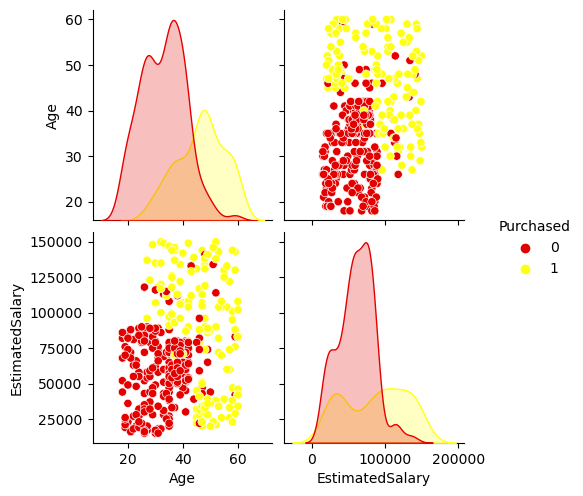

In [61]:
# multivariate analysis
colors = ['red', 'yellow']
sns.pairplot(df.drop('User ID', axis=1), hue='Purchased', palette=sns.xkcd_palette(colors))
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_5412\2939781239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop("User ID", axis=1).corr()


<Axes: >

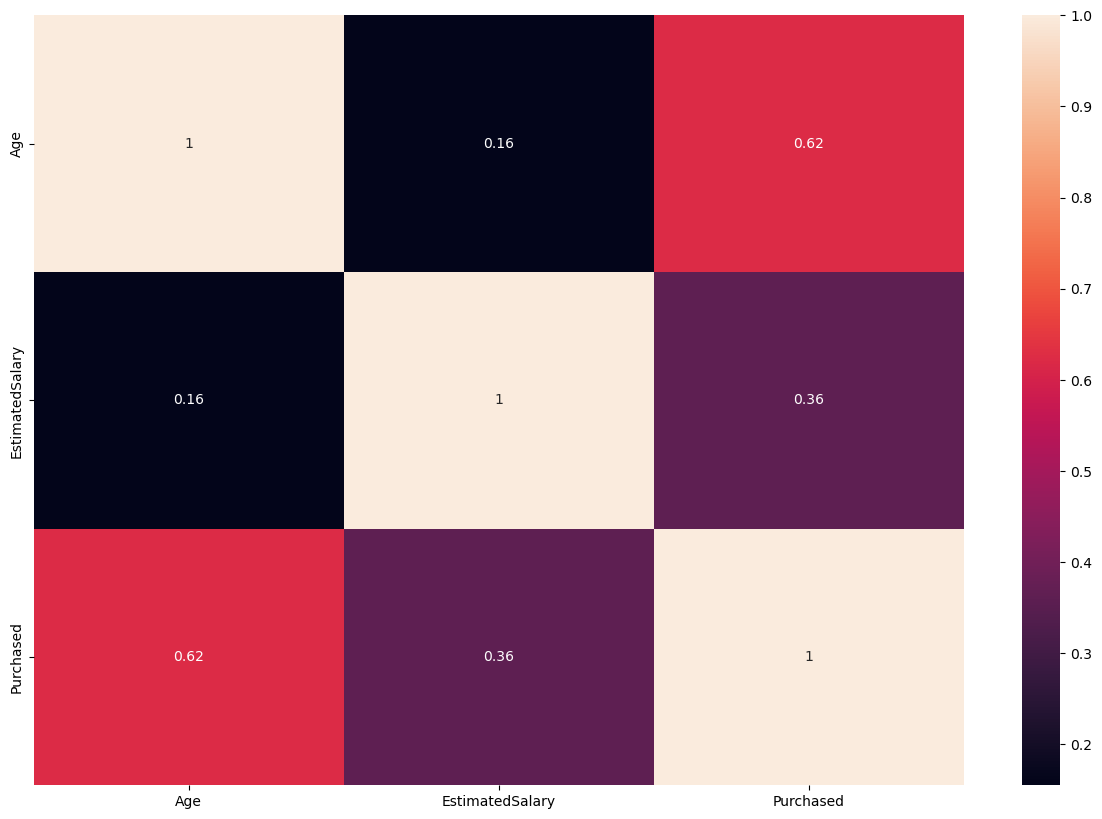

In [62]:
plt.figure(figsize=(15, 10))
corr = df.drop("User ID", axis=1).corr()
sns.heatmap(corr, annot=True)

In [63]:
# Preparing the data
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [64]:
# drop 'User ID' and 'Gender' columns
features = ['Age', 'EstimatedSalary']

X = df[features]
y = df['Purchased']


In [65]:
# split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [66]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [67]:
# Modelling
model = LogisticRegression()

In [68]:
# Training
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Evaluating the model

y_pred = model.predict(X_test)


In [70]:
# Accuracy score

accuracy_score(y_test, y_pred)

0.87

In [71]:
# confusion matrix
pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,63,5,68
1,8,24,32
All,71,29,100


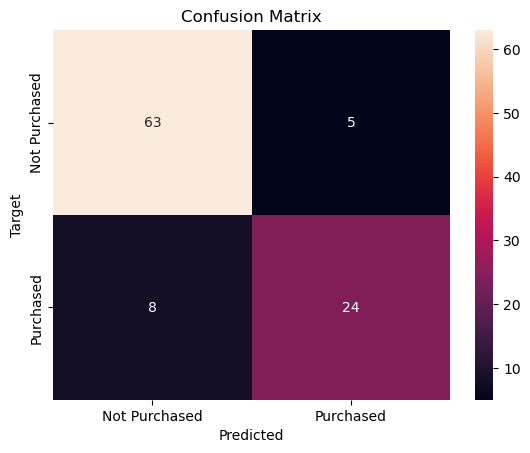

In [80]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'] )

plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100

